In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Training data folder

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='E:/Flower NLP Project/df_train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 2562 files belonging to 5 classes.


# Subfolder image data

In [5]:
import os

train_dir = 'E:/Flower NLP Project/df_train'
subfolders = os.listdir(train_dir)
subfolder_counts = {}

for folder in subfolders:
    folder_path = os.path.join(train_dir, folder)
    if os.path.isdir(folder_path):
        num_images = len(os.listdir(folder_path))
        print(f"Number of images in {folder}: {num_images}")
        subfolder_counts[folder] = num_images



Number of images in daisy: 501
Number of images in dandelion: 646
Number of images in rose: 468
Number of images in sunflower: 340
Number of images in tulip: 607


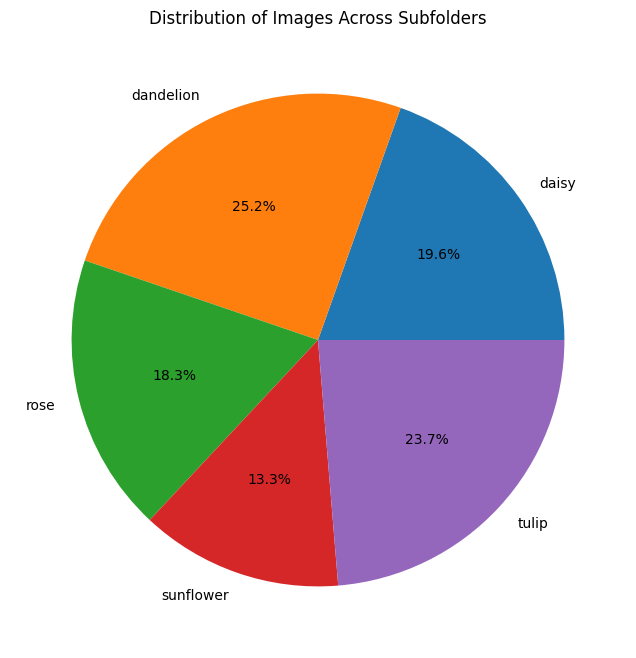

In [6]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(subfolder_counts.values(), labels=subfolder_counts.keys(), autopct='%1.1f%%')
plt.title('Distribution of Images Across Subfolders')
plt.show()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import cv2
import os
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.models import Model
from tensorflow.keras.layers import Activation, GlobalAveragePooling2D, Dropout, Flatten, Dense, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization
from tensorflow.keras.layers import Add, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Input
from keras.utils import to_categorical


In [14]:
train_path = 'E:/Flower NLP Project/df_train'
test_path = 'E:/Flower NLP Project/train'
class_names = os.listdir(train_path)
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [48]:
X = []
y = []

for i, class_name in enumerate(class_names): 
    class_path = os.path.join(train_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = imread(image_path) 

        image = cv2.resize(image, (224, 224))
        X.append(image)
        y.append(i)
X = np.array(X)
y = np.array(y)

In [49]:
X_t = []
y_t = []

for i, class_name in enumerate(class_names): 
    class_path = os.path.join(test_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = imread(image_path) 

        image = cv2.resize(image, (224, 224))
        X_t.append(image)
        y_t.append(i)
X_t = np.array(X_t)
y_t = np.array(y_t)

In [50]:
X_train, X_test_t, y_train, y_test = train_test_split(X_t, y_t, test_size = 0.2, random_state = 42, stratify = y_t)

In [51]:
y_train_encoded_t = to_categorical(y_train)
y_test_encoded_t = to_categorical(y_test)

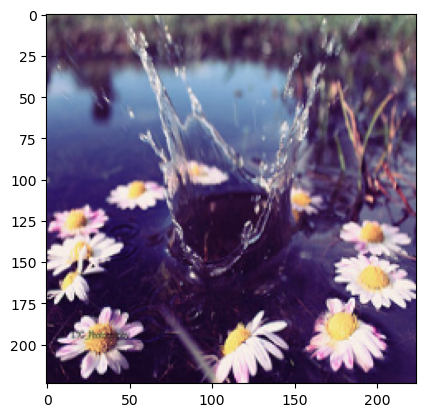

In [52]:
plt.imshow(X_t[1])

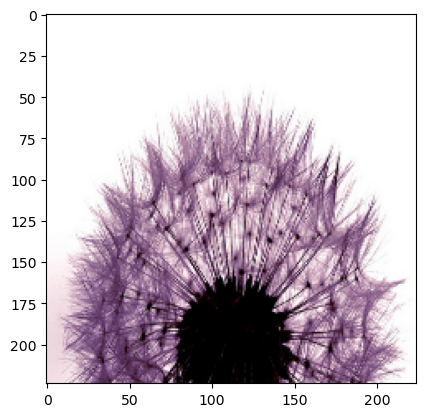

In [53]:
plt.imshow(X[923])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [56]:
# Convert target labels to one-hot encoded format
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [60]:
input_shape = 224, 224, 3
n_classes = 5

In [61]:
def googlenet(input_shape, n_classes):
    def inception_block(x, f):
        t1 = Conv2D(f[0], 1, activation="relu")(x)

        t2 = Conv2D(f[1], 1, activation="relu")(x)
        t2 = Conv2D(f[2], 3, padding="same", activation="relu")(t2)

        t3 = Conv2D(f[3], 1, activation="relu")(x)
        t3 = Conv2D(f[4], 5, padding="same", activation="relu")(t3)

        t4 = MaxPool2D(3, 1, padding="same")(x)
        t4 = Conv2D(f[5], 1, activation="relu")(t4)

        output = Concatenate()([t1, t2, t3, t4])
        return output

    input = Input(input_shape)

    x = Conv2D(64, 7, strides=2, padding="same", activation="relu")(input)
    x = MaxPool2D(3, strides=2, padding="same")(x)

    x = Conv2D(64, 1, activation="relu")(x)
    x = Conv2D(192, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(3, strides=2)(x)

    x = inception_block(x, [64, 96, 128, 16, 32, 32])
    x = inception_block(x, [128, 128, 192, 32, 96, 64])
    x = MaxPool2D(3, strides=2, padding="same")(x)

    x = inception_block(x, [192, 96, 208, 16, 48, 64])
    x = inception_block(x, [160, 112, 224, 24, 64, 64])
    x = inception_block(x, [128, 128, 256, 24, 64, 64])
    x = inception_block(x, [112, 144, 288, 32, 64, 64])
    x = inception_block(x, [256, 160, 320, 32, 128, 128])
    x = MaxPool2D(3, strides=2, padding="same")(x)

    x = inception_block(x, [256, 160, 320, 32, 128, 128])
    x = inception_block(x, [384, 192, 384, 48, 128, 128])

    x = AvgPool2D(7, strides=1)(x)
    x = Dropout(0.4)(x)

    x = Flatten()(x)
    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model

model = googlenet(input_shape, n_classes)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_114 (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_26              │ (None, 56, 56, 64)        │               0 │ conv2d_114[0][0]           │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_115 (Conv2D)           │ (None, 56, 56, 64)        │           4,160 │ max_pooling2d_26[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_116 (Conv2D)           │ (None, 56, 56, 192)       │         110,784 │ conv2d_115[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_27              │ (None, 27, 27, 192)       │               0 │ conv2d_116[0][0]           │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_118 (Conv2D)           │ (None, 27, 27, 96)        │          18,528 │ max_pooling2d_27[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_120 (Conv2D)           │ (None, 27, 27, 16)        │           3,088 │ max_pooling2d_27[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_28              │ (None, 27, 27, 192)       │               0 │ max_pooling2d_27[0][0]     │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_117 (Conv2D)           │ (None, 27, 27, 64)        │          12,352 │ max_pooling2d_27[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_119 (Conv2D)           │ (None, 27, 27, 128)       │         110,720 │ conv2d_118[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_121 (Conv2D)           │ (None, 27, 27, 32)        │          12,832 │ conv2d_120[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_122 (Conv2D)           │ (None, 27, 27, 32)        │           6,176 │ max_pooling2d_28[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_18 (Concatenate)  │ (None, 27, 27, 256)       │               0 │ conv2d_117[0][0],          │
│                               │                           │                 │ conv2d_119[0][0],          │
│                               │                           │                 │ conv2d_121[0][0],          │
│                               │                           │                 │ conv2d_122[0][0]           │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 5,978,677 (22.81 MB)

 Trainable params: 5,978,677 (22.81 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 15)
history = model.fit(X_train, y_train_encoded, epochs=100, validation_data=(X_test_t, y_test_encoded_t), callbacks = early_stop)

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 66s 706ms/step - accuracy: 0.2275 - loss: 2.9188 - val_accuracy: 0.2064 - val_loss: 2.1113
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 45s 697ms/step - accuracy: 0.2551 - loss: 1.6178 - val_accuracy: 0.2244 - val_loss: 1.6131
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 48s 740ms/step - accuracy: 0.2598 - loss: 1.5870 - val_accuracy: 0.2325 - val_loss: 1.6044
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 48s 743ms/step - accuracy: 0.3352 - loss: 1.5196 - val_accuracy: 0.3507 - val_loss: 1.4535
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 50s 767ms/step - accuracy: 0.3888 - loss: 1.3372 - val_accuracy: 0.3788 - val_loss: 1.3619
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.3889 - loss: 1.4150 - val_accuracy: 0.3828 - val_loss: 1.3254
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.3967 - loss: 1.3063 - val_accuracy: 0.4088 - val_loss: 1.3130
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.4681 - loss: 1.2336 - val_accu

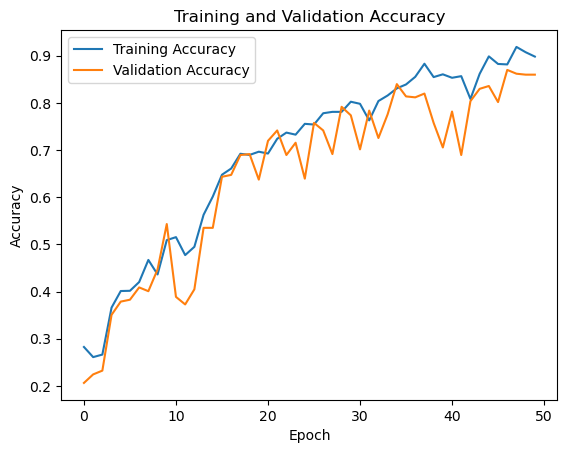

In [64]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

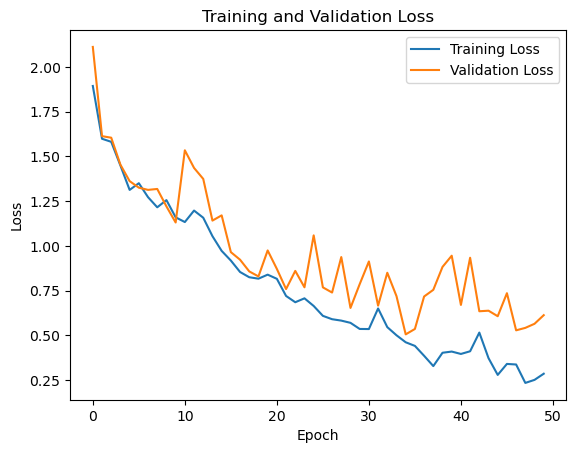

In [65]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [63]:
model.save(r"E:\Flower NLP Project\0. models\data\inception_GAN.h5")

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
y_train_pred=model.predict(X_train)
probs = np.array(y_train_pred)
y_train_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_train, y_train_pred)) 
print(classification_report(y_train, y_train_pred))

65/65 ━━━━━━━━━━━━━━━━━━━━ 34s 464ms/step
[[378  12   1   0  10]
 [  0 510   6   0   1]
 [  0  22 335   0  17]
 [  3   1   0 268   0]
 [  1  25  38   1 420]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       401
           1       0.89      0.99      0.94       517
           2       0.88      0.90      0.89       374
           3       1.00      0.99      0.99       272
           4       0.94      0.87      0.90       485

    accuracy                           0.93      2049
   macro avg       0.94      0.94      0.94      2049
weighted avg       0.93      0.93      0.93      2049



In [68]:
y_pred=model.predict(X_test)
probs = np.array(y_pred)
y_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 385ms/step
[[ 71  15   6   0   8]
 [  1 119   3   2   4]
 [  5  10  53   1  25]
 [  0   4   1  61   2]
 [  2  11  30   1  78]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       100
           1       0.75      0.92      0.83       129
           2       0.57      0.56      0.57        94
           3       0.94      0.90      0.92        68
           4       0.67      0.64      0.65       122

    accuracy                           0.74       513
   macro avg       0.76      0.75      0.75       513
weighted avg       0.75      0.74      0.74       513



In [12]:
train_path = 'E:/Flower NLP Project/df_train'
test_path = 'E:/Flower NLP Project/test'

In [13]:
class_names = os.listdir(train_path)
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
y_train_pred=model.predict(X)
probs = np.array(y_train_pred)
y_train_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y, y_train_pred)) 
print(classification_report(y, y_train_pred))

81/81 ━━━━━━━━━━━━━━━━━━━━ 32s 395ms/step
[[449  27   7   0  18]
 [  1 629   9   2   5]
 [  5  32 388   1  42]
 [  3   5   1 329   2]
 [  3  36  68   2 498]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       501
           1       0.86      0.97      0.91       646
           2       0.82      0.83      0.82       468
           3       0.99      0.97      0.98       340
           4       0.88      0.82      0.85       607

    accuracy                           0.90      2562
   macro avg       0.90      0.90      0.90      2562
weighted avg       0.90      0.90      0.89      2562



In [38]:
from tensorflow.keras.models import load_model
model = load_model(r"E:\Flower NLP Project\0. models\data\inception_GAN.h5")

In [39]:
import numpy as np
import os
from PIL import Image
from tensorflow.keras.preprocessing import image as keras_image

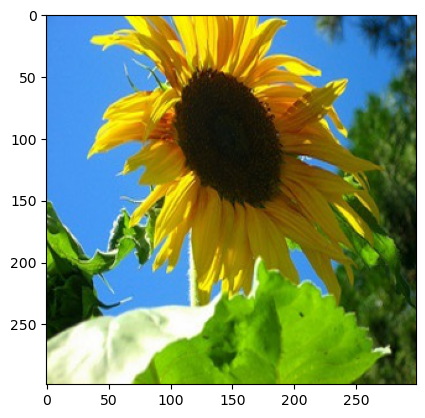

In [44]:
# Load the test image
test_image_path = r"E:\Flower NLP Project\test\Image_1.jpg"
test_image = Image.open(test_image_path)
test_image = test_image.resize((299, 299))
plt.imshow(test_image)

In [45]:
# Convert the image to array and preprocess
test_image_array = keras_image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)
test_image_array /= 255.  # Normalize the image data

In [46]:
# Predict the class probabilities
predicted_probabilities = model.predict(test_image_array)

# Get the predicted class index
predicted_class_index = np.argmax(predicted_probabilities[0])

# Map the predicted class index to class name
predicted_class_name = class_names[predicted_class_index]
print(predicted_probabilities)
print("Predicted class:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[0.00427394 0.01010814 0.00741322 0.9554578  0.0227469 ]]
Predicted class: sunflower


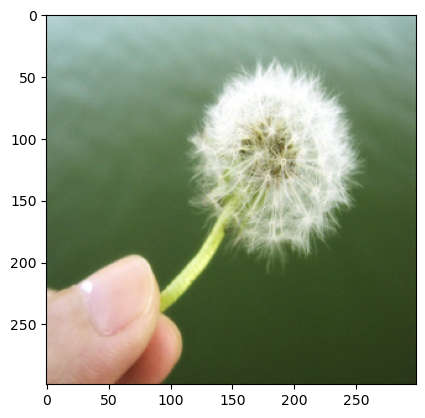

In [50]:
# Load the test image
test_image_path = r"E:\Flower NLP Project\test\Image_20.jpg"
test_image = Image.open(test_image_path)
test_image = test_image.resize((299, 299))
plt.imshow(test_image)

In [51]:
# Convert the image to array and preprocess
test_image_array = keras_image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)
test_image_array /= 255.  # Normalize the image data

In [52]:
# Predict the class probabilities
predicted_probabilities = model.predict(test_image_array)

# Get the predicted class index
predicted_class_index = np.argmax(predicted_probabilities[0])

# Map the predicted class index to class name
predicted_class_name = class_names[predicted_class_index]
print(predicted_probabilities)
print("Predicted class:", predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[0.06672342 0.6507841  0.15083534 0.00664579 0.1250114 ]]
Predicted class: dandelion


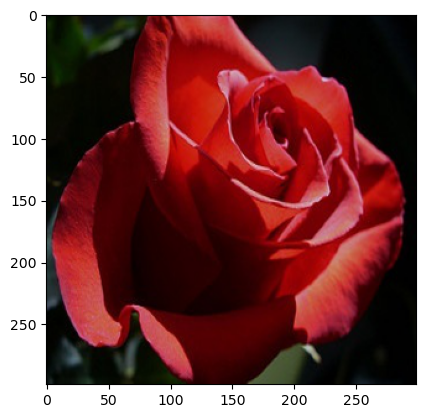

In [53]:
# Load the test image
test_image_path = r"E:\Flower NLP Project\test\Image_96.jpg"
test_image = Image.open(test_image_path)
test_image = test_image.resize((299, 299))
plt.imshow(test_image)

In [54]:
# Convert the image to array and preprocess
test_image_array = keras_image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)
test_image_array /= 255.  # Normalize the image data

In [55]:
# Predict the class probabilities
predicted_probabilities = model.predict(test_image_array)

# Get the predicted class index
predicted_class_index = np.argmax(predicted_probabilities[0])

# Map the predicted class index to class name
predicted_class_name = class_names[predicted_class_index]
print(predicted_probabilities)
print("Predicted class:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[0.00481953 0.0078303  0.66400486 0.00955666 0.31378862]]
Predicted class: rose


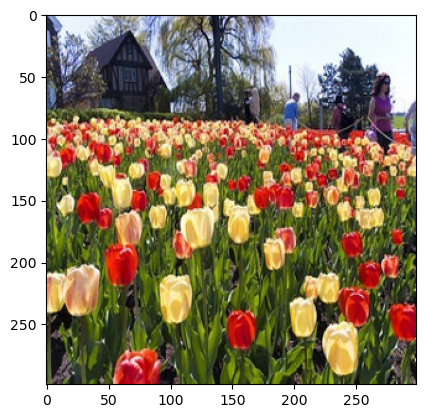

In [59]:
# Load the test image
test_image_path = r"E:\Flower NLP Project\test\Image_911.jpg"
test_image = Image.open(test_image_path)
test_image = test_image.resize((299, 299))
plt.imshow(test_image)

In [60]:
# Convert the image to array and preprocess
test_image_array = keras_image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)
test_image_array /= 255.  # Normalize the image data

In [61]:
# Predict the class probabilities
predicted_probabilities = model.predict(test_image_array)

# Get the predicted class index
predicted_class_index = np.argmax(predicted_probabilities[0])

# Map the predicted class index to class name
predicted_class_name = class_names[predicted_class_index]
print(predicted_probabilities)
print("Predicted class:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[0.00393051 0.00662692 0.10902541 0.0376762  0.842741  ]]
Predicted class: tulip


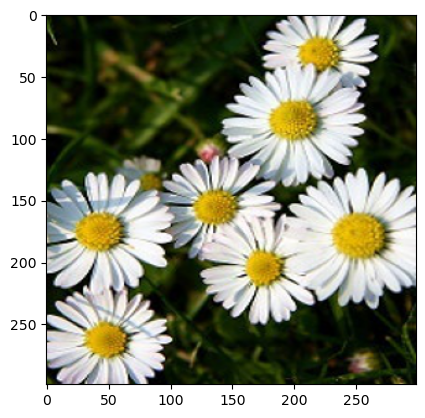

In [71]:
# Load the test image
test_image_path = r"E:\Flower NLP Project\test\Image_67.jpg"
test_image = Image.open(test_image_path)
test_image = test_image.resize((299, 299))
plt.imshow(test_image)

In [72]:
# Convert the image to array and preprocess
test_image_array = keras_image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)
test_image_array /= 255.  # Normalize the image data

In [73]:
# Predict the class probabilities
predicted_probabilities = model.predict(test_image_array)

# Get the predicted class index
predicted_class_index = np.argmax(predicted_probabilities[0])

# Map the predicted class index to class name
predicted_class_name = class_names[predicted_class_index]
print(predicted_probabilities)
print("Predicted class:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[9.9824154e-01 6.9867958e-05 1.0252403e-03 3.1896695e-04 3.4441313e-04]]
Predicted class: daisy
